In [1]:
def findrank(z):
    
    import pandas as pd
    import collections
    import numpy as np
    from collections import defaultdict
    import networkx as nx
    from scipy.stats import spearmanr
    import matplotlib.pyplot as plt


    G = nx.read_edgelist(str(z)+".txt", create_using = nx.DiGraph,nodetype=str)
    lst_alpha=[]
    lst_rpc=[]
    lst_rcb=[]
    lst_rpb=[]
    for i in range(9):        
        result_p = nx.pagerank(G,alpha=0.5+i*0.05)
        y=0.5+i*0.05
        lst_alpha.append(y)
        sorted_result_p = sorted(result_p.items(), key=lambda kv: kv[1],reverse=True)
        sorted_dict_p = collections.OrderedDict(sorted_result_p)
        list_all_pagerank=list(sorted_dict_p)
        rank_all_pagerank=[]
        for j in list_all_pagerank:
            rank_all_pagerank.append((list_all_pagerank).index(j) + 1)
    
        result_all_closeness = nx.closeness_centrality(G)
        sorted_result_closeness = sorted(result_all_closeness.items(), key=lambda kv: kv[1],reverse=True)
        sorted_dict_closeness = collections.OrderedDict(sorted_result_closeness)
        list_all_closeness=list(sorted_dict_closeness)
    
    
        result_between = nx.betweenness_centrality(G)
        sorted_result_between= sorted(result_between.items(), key=lambda kv: kv[1],reverse=True)
        sorted_dict_between = collections.OrderedDict(sorted_result_between)
        list_all_between=list(sorted_dict_between)
 
        rank_all_closeness=[]
        for k in range(len(list_all_pagerank)):
            pos=list_all_closeness.index(list_all_pagerank[k])
            rank_all_closeness.append(pos+1)
        
        
        rank_all_between=[]
        for l in range(len(list_all_pagerank)):
            pos=list_all_between.index(list_all_pagerank[l])
            rank_all_between.append(pos+1)
        
        
        list_z_rank=list(zip(list_all_pagerank,rank_all_pagerank,rank_all_closeness,rank_all_between))
        df_z_rank=pd.DataFrame(list_z_rank,columns=["Entity","Rank-Pagerank","Rank-Closeness","Rank-Between"])
        print(df_z_rank)
        r_p_c,p1=spearmanr(df_z_rank["Rank-Pagerank"],df_z_rank["Rank-Closeness"])
        r_c_b,p2=spearmanr(df_z_rank["Rank-Between"],df_z_rank["Rank-Closeness"])
        r_p_b,p3=spearmanr(df_z_rank["Rank-Between"],df_z_rank["Rank-Pagerank"])
        lst_rpc.append(r_p_c)
        lst_rcb.append(r_c_b)
        lst_rpb.append(r_p_b)
    list_spearman=list(zip(lst_alpha,lst_rpc,lst_rcb,lst_rpb))
    df_spearman=pd.DataFrame(list_spearman,columns=["Alpha","Pagerank-Closeness","Closeness-Betweenness","Pagerank-Betweenness"])
    print(df_spearman)
    fig,ax=plt.subplots()
    ax.plot(df_spearman["Alpha"], df_spearman["Pagerank-Closeness"], marker="o",color="red")
    ax.plot(df_spearman["Alpha"], df_spearman["Closeness-Betweenness"], marker="o",color="orange")
    ax.plot(df_spearman["Alpha"], df_spearman["Pagerank-Betweenness"], marker="o",color="blue")
    ax.set_xlabel("Alpha")
    ax.set_ylabel("Rank-Correlation")
    ax.set_title(z)
    ax.legend(["Pagerank-Closeness","Closeness-Betweenness","Pagerank-Betweenness"], bbox_to_anchor=(1.5, 0.5))
    plt.show()

         Entity  Rank-Pagerank  Rank-Closeness  Rank-Between
0    student155              1               6           553
1    student376              2              91           301
2    student263              3              16            14
3     faculty85              4              67            34
4      course62              5               1            57
..          ...            ...             ...           ...
872  student411            873             871           869
873  faculty122            874             872           871
874  student415            875             873           872
875   course216            876             874           873
876  faculty124            877             875           874

[877 rows x 4 columns]
         Entity  Rank-Pagerank  Rank-Closeness  Rank-Between
0    student155              1               6           553
1    student376              2              91           301
2    student263              3              16            14


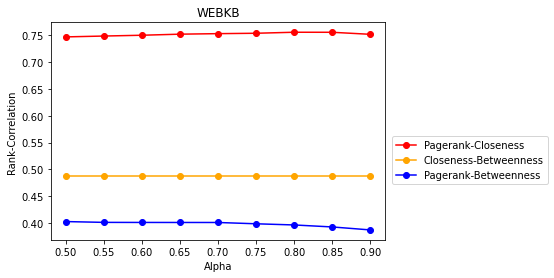

In [2]:
findrank("WEBKB")

         Entity  Rank-Pagerank  Rank-Closeness  Rank-Between
0    student376              1              39           291
1    student263              2               7             3
2     student23              3              10           152
3    student319              4               3             9
4    student112              5              18            37
..          ...            ...             ...           ...
665   project79            666             666           665
666  faculty122            667             667           666
667   course216            668             668           667
668  faculty123            669             669           668
669   course218            670             670           670

[670 rows x 4 columns]
         Entity  Rank-Pagerank  Rank-Closeness  Rank-Between
0    student376              1              39           291
1    student263              2               7             3
2    student319              3               3             9


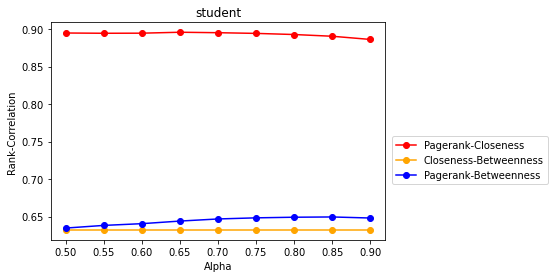

In [3]:
findrank("student")

        Entity  Rank-Pagerank  Rank-Closeness  Rank-Between
0      staff37              1               1             1
1      staff23              2               2            54
2    project67              3              10             3
3      staff20              4               3            52
4      staff31              5               8            76
..         ...            ...             ...           ...
81   project72             82              82            81
82  faculty112             83              83            82
83  faculty114             84              84            83
84   project79             85              85            84
85  faculty122             86              86            86

[86 rows x 4 columns]
        Entity  Rank-Pagerank  Rank-Closeness  Rank-Between
0      staff37              1               1             1
1      staff23              2               2            54
2    project67              3              10             3
3      staff20   

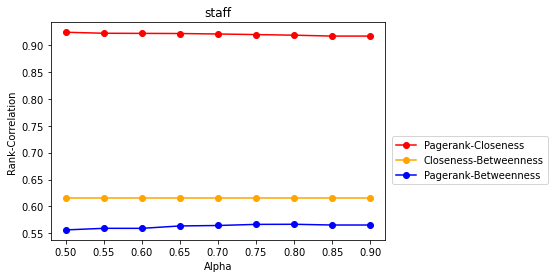

In [4]:
findrank("staff")

         Entity  Rank-Pagerank  Rank-Closeness  Rank-Between
0      course62              1               1           113
1     faculty53              2               4            22
2     faculty85              3               7             9
3     faculty97              4               6             8
4    faculty100              5               8             7
..          ...            ...             ...           ...
393   course208            394             394           394
394   project78            395             395           395
395   course210            396             396           396
396   project79            397             397           397
397     staff38            398             398           398

[398 rows x 4 columns]
         Entity  Rank-Pagerank  Rank-Closeness  Rank-Between
0      course62              1               1           113
1     faculty53              2               4            22
2     faculty85              3               7             9


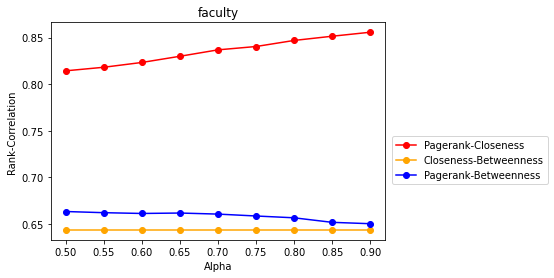

In [5]:
findrank("faculty")

         Entity  Rank-Pagerank  Rank-Closeness  Rank-Between
0     project34              1              11            12
1     project22              2               1             4
2     project45              3               2            22
3     project26              4              19            29
4     project49              5              23            34
..          ...            ...             ...           ...
284   faculty96            285             285           285
285  student346            286             286           286
286  faculty110            287             287           287
287  student369            288             288           288
288  faculty124            289             289           289

[289 rows x 4 columns]
         Entity  Rank-Pagerank  Rank-Closeness  Rank-Between
0     project34              1              11            12
1     project45              2               2            22
2     project22              3               1             4


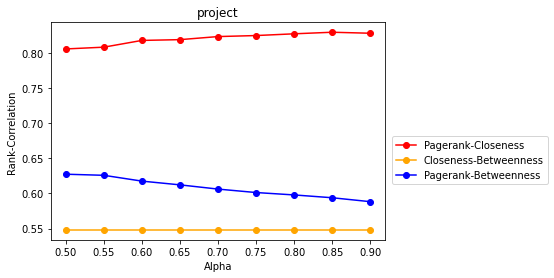

In [6]:
findrank("project")

         Entity  Rank-Pagerank  Rank-Closeness  Rank-Between
0      course62              1               4             9
1    student155              2              11           385
2      course46              3             166           372
3     course153              4              10             1
4     course154              5               9           552
..          ...            ...             ...           ...
717  student403            718             718           718
718  student411            719             719           719
719  faculty122            720             720           720
720  student415            721             721           721
721     staff39            722             722           722

[722 rows x 4 columns]
         Entity  Rank-Pagerank  Rank-Closeness  Rank-Between
0      course62              1               4             9
1    student155              2              11           385
2      course46              3             166           372


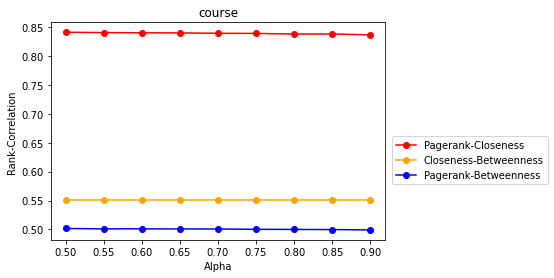

In [7]:
findrank("course")